# Graph Theory Questions for Jupyter-based Exam

## Instructions
1. You may use any source of information you can find, so long as you don't communicate with anyone else.
2. You can put your answers in the marked cells; please first answer with markdown and then with code.
3. You can split up your code answers into multiple cells if you like, but keep them in order for me to grade!
4. You have 90 minutes total for the exam (unless you are eligible for "Special Facilities"), distribute it wisely amongst questions.
5. Remember you can look up the documentation of any function or object by appending "?" (question mark) to it without calling it with "()"; this is the same documentation as you'd look up on the internet! See an example in the next cell.
6. Your final grade will be `score / 70 * 9 + 1`


In [32]:
nx.Graph?

Init signature: nx.Graph(incoming_graph_data=None, **attr)
Docstring:     
Base class for undirected graphs.

A Graph stores nodes and edges with optional data, or attributes.

Graphs hold undirected edges.  Self loops are allowed but multiple
(parallel) edges are not.

Nodes can be arbitrary (hashable) Python objects with optional
key/value attributes, except that `None` is not allowed as a node.

Edges are represented as links between nodes with optional
key/value attributes.

Parameters
----------
incoming_graph_data : input graph (optional, default: None)
    Data to initialize graph. If None (default) an empty
    graph is created.  The data can be any format that is supported
    by the to_networkx_graph() function, currently including edge list,
    dict of dicts, dict of lists, NetworkX graph, 2D NumPy array, SciPy
    sparse matrix, or PyGraphviz graph.

attr : keyword arguments, optional (default= no attributes)
    Attributes to add to graph as key=value pairs.

See Also
---

# -- BEGIN EXAM --
Good luck!
*Don't forget to run the global imports defined in the next cell!!!*

In [33]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import numpy as np
from math import log
import json as jn
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 (7pt)

1. What is the definition of a "cycle"?
2. Given a simple, undirected graph without self-loops, what is the size of the smallest cycle possible?
3. Given a simple, undirected graph *with* self-loops, what is the size of the smallest cycle possible?
4. Given a simple, directed graph without self-loops, what is the size of the smallest cycle possible?
5. Given a simple, undirected bipartite graph, what is the size of the smallest cycle possible?
6. Given a complete graph, what is the size of the smallest cycle?
7. Explain what the following means: $N(v) = {w \in V(G) | v \neq w, \exists e \in E(G) : e = (w, v)}$

### Text Markdown answers to question 1


In [34]:
# 1- a path in a graph that starts and ends at the same vertex, with no other repeated vertices along the way
# (at least 3, if the graph is simple) connected in a closed chain.
# 2- the smallest possible cycle size is three. 
# 3- the smallest possible cycle size is one. 
# 4- again the smallest size for this graph can THREE.
# 5- however, here the smallest cycle in a bipartite graph does NOT have the size of THREE
# but its size is FOUR here.
# 6- again the smallest passible cycle has the size of THREE.
# 7- this is the set of the neighbors for node v


## Question 2 (21pt)
A citation graph is a DiGraph consisting of papers as nodes, and citations as edges. An edge will point from paper A to paper B iff paper A cites paper B.

An author's h-index is defined as the maximum value of $h$ such that the given author/journal has published at least $h$ papers that have each been cited at least $h$ times.

1. Read in the DiGraph in the file `citation_graph.json`. It is in node-link format. Nodes represent papers. Each node (paper) has an `'AuthIds'` attribute, which is a list of that paper's authors. If you are unable to read in the graph, use the following bit of code:
```python
import pickle
with open('citation_graph.pickle', 'rb') as jar:
        citation_graph = pickle.load(jar) 
```
2. Is this DiGraph a DAG, and why should/shouldn't it be?
3. What is the most cited paper?
4. What is the most cited author?
3. Write a function that calculates the h-index for authors. Which author has the highest h-index?

### Text Markdown Answers to Question 2


In [35]:
# the best way of reading a json file
with open('citation_graph.json', 'r') as f:
    data = jn.load(f)
citation_graph = nx.json_graph.node_link_graph(data)

print(citation_graph)
print(nx.is_directed_acyclic_graph(citation_graph))
print(nx.find_cycle(citation_graph))
print(citation_graph.nodes['5EFE608F']['AuthIds'])

DiGraph with 32025 nodes and 66825 edges
False
[('01033C30', '01033C30')]
['1439A67D', '65ADDE99', '124D5F8F', '0F13C554']


In [36]:
# 1- first open the file as a json file then turn it into a graph

# open the json file, and make a blue print of a graph
json_file = open('citation_graph.json')
json_file = jn.load(json_file)
graph = nx.DiGraph()

# add all the nodes to the graph with their authors
for article in json_file['nodes']:
    graph.add_nodes_from([(article['id'], {'AuthIds':article['AuthIds']})])

# add all the edges
for citation in json_file['links']:
    graph.add_edge(citation['source'], citation['target'])

print(graph)
print(graph.nodes)
print(graph.edges)
print(graph['5EFE608F'])

DiGraph with 32025 nodes and 66825 edges
['5EFE608F', '0614EC20', '583C2756', '59A6581F', '5AD6498D', '02349EA6', '5EADC1A8', '6933914', '5E56AF20', '5D5EEBBE', '5A84BC74', '5AFB507C', '5FC060CA', '589F0D54', '041CD8D0', '02526A08', '0670B923', '245789CC', '0A1AAEB5', '5F3D6AF2', '5B9D8521', '3E381F9D', '6AEC0E85', '5CD5E76F', '04FFC274', '5A367D11', '583BE7D3', '5E2DB25B', '5B0305B8', '5C7CD4A6', '5F1AF850', '58BE413C', '5F016A2D', '5FCADE37', '096725C9', '5F4FB957', '5CFEA184', '0B40EC28', '68AAE4AB', '5B9672C9', '59D3FE14', '5B7A45C2', '5EA6D6DC', '5C4F3A4E', '0427FA78', '5964965F', '5A9DC7D1', '5ED4DBF0', '5C52D6F3', '624A88DF', '02DBCF31', '5AE19994', '61C356E7', '5CEC5C28', '611F0320', '5E144BD8', '5CA615EA', '5EB28260', '01BB5FD2', '5EF666E9', '5E5091E3', '5DFDFA9F', '05501E8B', '59AAB8E9', '58527CB3', '06A50985', '5878F034', '5962A363', '5CC718CE', '5A130E7A', '5FDAC590', '6DB659B9', '5871A730', '7021F6EC', '0215B23A', '6786AFD7', '6B3E9497', '5AF7B869', '6DD515D6', '0A25B13C',

In [37]:
# 2- Yes ofcourse this graph is a directed ACYCLIC graph. Because, otherwise an
# article in the past should cite and article from future, which is totally impossible and implausible. 

In [38]:
# 3- to find the article with the largest number of citation one can use in_degree function 
citation_number = list(graph.in_degree) 
most_citation = 0

for article in citation_number:

    if article[1] > most_citation:
        most_citation = article[1]
        most_cited_article = article[0]

print(f'article: {most_cited_article}\nthe nimber of citation: {most_citation}')

article: 13DFA56F
the nimber of citation: 309


In [39]:
#4- to solve this problem, first i make a dictionary that keys are authors and values are artciles

# make a dictionary for authors
authors_dict = {}
nodes = graph.nodes(data=True)

# for each article extract its authors
for article in nodes:
    authors = list(article[1].values())[0]

    # for each author in the mentioned article, save its author or add the article to the list of author
    for author in authors:

        if author not in authors_dict.keys():
            authors_dict[author] = [article[0]]
        
        else:
            authors_dict[author].append(article[0])


# for each author in the dictionary find the citation of his or her articles
most_cited = 0
for author in authors_dict.keys():
    citation = 0
    articles = authors_dict[author]

    # add citations to a variable
    for article in articles:
        citation += graph.in_degree[article]

        # find the maximum citation
        if citation > most_cited:
            most_cited = citation
            most_cited_author = author

print(f'the most cited author: {most_cited_author}\nthe number of citation: {most_cited}')

    

the most cited author: 5D298F62
the number of citation: 614


In [40]:
# 5- to find the h-index of each author we have the proper dictionary that can be used here
# h-index can maximally be the number of an author's articles. so we can use this fact and
# restrict our search for h-index. 

def h_index(authors_dict, graph):

    # by using the author dictionary find the number of article for each author
    h_index_dict = {}
    for author in authors_dict.keys():
        number_article = len(authors_dict[author])

        # start counting from the maximum number of h-index one can have (number of article)
        for counter in range(number_article , 0, -1):
            h_index = 0

            # check the number of citation for each article
            for article in authors_dict[author]:
                
                # if number of citation is more than the counter add one to h-index
                if graph.in_degree[article] >= counter:
                    h_index += 1

            # if number of article is more than the counter
            if h_index >= counter:
                h_index_dict[author] = counter
                break

    highest_h_index = 0
    highest_author = ' '

    # loop over the dictionary to find the highest
    for author in h_index_dict.keys():
        if h_index_dict[author] > highest_h_index:
            highest_h_index = h_index_dict[author]
            highest_author = author

    return h_index_dict, highest_author, highest_h_index

h_index_dict, highest_author, highest_h_index = h_index(authors_dict, graph)
print(f'the author with highest h-index is: {highest_author}\nh-index: {highest_h_index}')

the author with highest h-index is: 1025DB64
h-index: 10


## Question 3 (21pt)
For the book Les Miserable someone counted how often pairs of characters appeared in the same scene. This can of course be represented as a graph where nodes are characters, and there is an edge between 2 characters if they appear in the same scene. In addition, the edges can be weighted by how many scenes they share.

We'll investigate who the central characters in this story are. One measure you could use is the *betweenness centrality*. This is defined as follows:
> Let $G$ be a simple, connected graph. Let $S(x, y)$ be the set of shortest paths between two vertices $x, y \in V(G)$, and $S(x, u, y) \subseteq S(x,y)$ the ones that pass through node $u \in V(G)$. The *betweenness centrality* $c_B(u)$ of node $u$ is defined as: $$c_B(u) = \sum_{x \neq y} \frac{|S(x, u, y)|}{|S(x, y)|}$$

1. Explain in your own words what the betweenness centrality means.
2. What other measures, besides the betweenness centrality, could you use to find the main character(s)?
3. Load the graph in the file `les_miserables.graphml`. The file is in GraphML format. If you are unable to read in the file, use the following snippet of code: 
```python
graph = nx.les_miserables_graph()
```
4. Find the 5 most important characters. Use the betweenness centrality (use an existing implementation), and at least one other measure you can think of. Do your chosen metrics agree with eachother? Why (not)?

### Text Markdown Answers to Question 3


In [41]:
# 1- it determines that how much percentages of the shortest paths run through a node 
# 2- there are other types of centrality one can use to find a central character. But, choosing the proper
# centrality method depends on the definition of the centrality that we want to use for the graph. 
# another centrality method that one may use in this question can be (degree centrality)
# degree centrality: dived the nodes based on  their degree. The node with highest degree centrality means
# that it has the highest degree is a central node. Also one can use (eigenvalue centrality)
# it cares about the importance of the nodes that a node is connected to. in this way one can find that is each 
# character is connected to other important characters and one which is the most connected to other important characters
# is the central node. 

Graph with 77 nodes and 254 edges
['Napoleon', 'Myriel', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Valjean', 'Labarre', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Listolier', 'Tholomyes', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'MmeBurgon', 'Jondrette', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon',

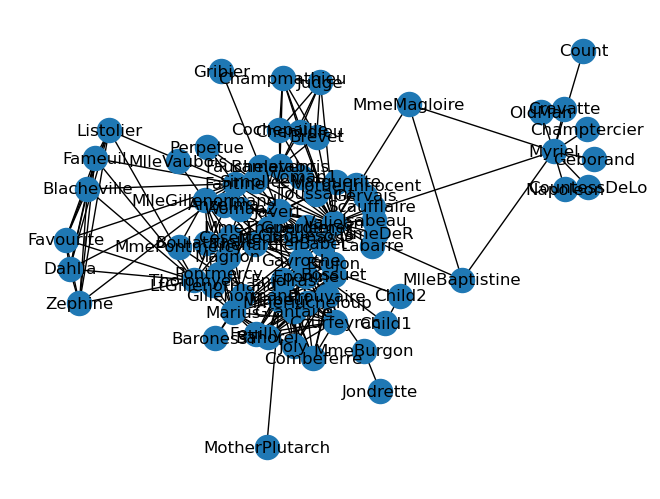

In [42]:
# to open the file we can use the following commands, also we can find some of its features
graph.clear()
graph = nx.read_graphml('les_miserables.graphml')
print(graph)
print(graph.nodes)
print(graph.edges(data=True))
nx.draw_kamada_kawai(graph, with_labels=True)

In [48]:
# 4- I start with betweenness and then try other centralities

# betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph, weight='weight')
#print(f'betweenness: {betweenness_centrality}')

# find the central node
sorted_weights = list(sorted(betweenness_centrality.values(), reverse=True))
top_two_nodes = {}
for weight in sorted_weights[0:5]:
    for key, value in betweenness_centrality.items():
        if value == weight:
            top_two_nodes[key] = value

print(f'the most social/central nodes are (betweenness centrality): {top_two_nodes}')

# degree centrality
degree_centrality = nx.degree_centrality(graph)
#print(f'degre: {degree_centrality}')

# find the central node
centrality_value = 0 
for character in degree_centrality:
    if degree_centrality[character] > centrality_value:
        centrality_value = degree_centrality[character]
        center_node = character

print(f'the central node based on this centrality is {center_node}')
print(f' with the number of plays {centrality_value}')

# eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(graph, weight='weight')
print(f'eigenvenctor: {eigenvector_centrality}')

# find the central node
centrality_value = 0 
for character in eigenvector_centrality:
    if eigenvector_centrality[character] > centrality_value:
        centrality_value = eigenvector_centrality[character]
        center_node = character

print(f'the central node based on this centrality is {center_node}')
print(f' with the number of plays {centrality_value}')


# closeness centrality
closeness_centrality = nx.closeness_centrality(graph, distance='weight')
print(f'closeness: {closeness_centrality}')

# find the central node
centrality_value = 0 
for character in closeness_centrality:
    if closeness_centrality[character] > centrality_value:
        centrality_value = closeness_centrality[character]
        center_node = character

print(f'the central node based on this centrality is {center_node}')
print(f' with the number of plays {centrality_value}')


the most social/central nodes are (betweenness centrality): {68: 0.02172076426211631, 10: 0.01623637261367938, 40: 0.01618384670876986, 66: 0.01583350354025208, 7: 0.015140425543376279}
the central node based on this centrality is 68
 with the number of plays 0.32323232323232326
eigenvenctor: {0: 0.08156273588557332, 1: 0.1158215639737828, 2: 0.08230832847011789, 3: 0.07605164963168319, 4: 0.09316562685116953, 5: 0.049054820453132815, 6: 0.07743990032680474, 7: 0.14288378412726746, 8: 0.10887736340084395, 9: 0.07518330872005381, 10: 0.1315163717129696, 11: 0.07680405886897036, 12: 0.0790798019764124, 13: 0.09333217743438516, 14: 0.09418355959803784, 15: 0.10656930176031476, 16: 0.0750821882581511, 17: 0.09756900433157562, 18: 0.10394933707424288, 19: 0.12078440446008569, 20: 0.10404877840055948, 21: 0.04524208642823669, 22: 0.10565185890458699, 23: 0.10693648630234118, 24: 0.12737607521376135, 25: 0.11557981884879225, 26: 0.07536825841221739, 27: 0.09307414259096633, 28: 0.159329917959

## Question 4 (21pt)
Given a number of nodes you can create a random graph by randomly adding edges between those nodes. This is also known as an Erdős–Rényi random graph, or gnp graph. You can generate such a graph using the networkx function `nx.fast_gnp_random_graph`. 

We will investigate the following statement: Almost every graph in $G(n, \frac{2 ln(n)}{n})$ is connected, where $n$ is the number of nodes, and $\frac{2ln(n)}{n}$ the chance that any 2 nodes are connected.

1. What does it mean for a graph to be "connected"?
2. Take `n = 100` and `p = 0.02`. Generate the corresponding gnp graph. What is the size of largest connected component in that graph?
3. Given a fixed value for n (e.g. 100), plot the size of the largest connected component as a function of p. Do you find the given statement to be correct?

Hint: use something like `plt.plot(p_values, sizes)` to make the plot.

### Text Markdown Answers to Question 4


In [44]:
# 1- A graph is said to be connected if every pair of vertices in the graph is connected. 
# This means that there is a path between every pair of vertices. An undirected graph that
# is not connected is called disconnected.

Graph with 100 nodes and 109 edges
the longest component is: {0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 36, 37, 39, 40, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 77, 78, 79, 81, 82, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
the numbero of its node is: 86


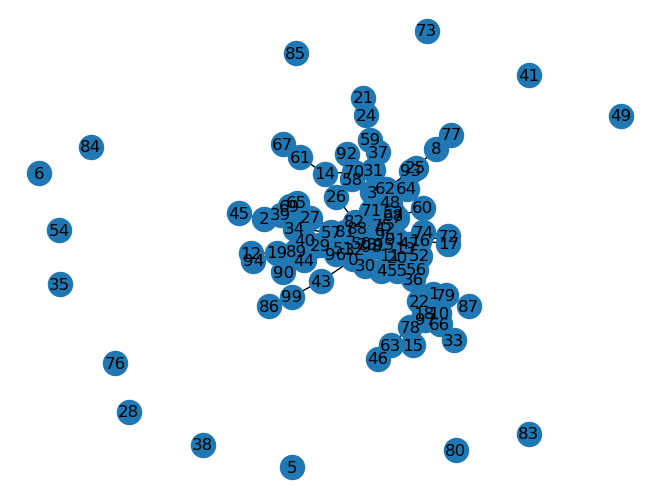

In [45]:
# 2- I will use the this random function first then try is connected first

# find the connected components of the graph
graph.clear()
graph = nx.fast_gnp_random_graph(n=100, p=0.02)
connected_components = list(nx.connected_components(graph))

# find the component with the highest lenght
lenght_component = 0
for component in connected_components:
    if len(component) > lenght_component:
        lenght_component = len(component)
        longest_component = component

# print everything
print(graph)
print(f'the longest component is: {longest_component}')
print(f'the numbero of its node is: {lenght_component}')

nx.draw_spring(graph, with_labels=True)

the magnitude of the prediction: 0.09210340371976183
the number of node for probability 0.09 when the actual number of node is 100 is 100


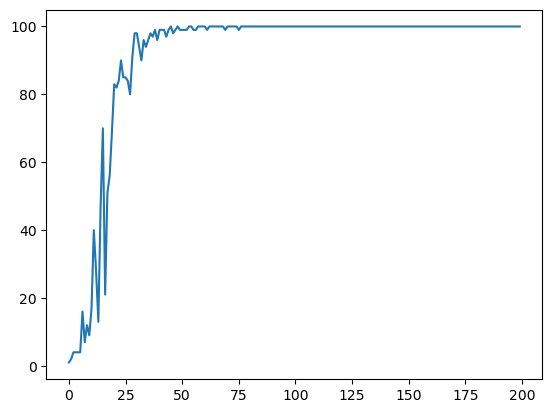

In [46]:
# this is the predicted number
print(f'the magnitude of the prediction: {(2. * np.log(100)) / 100.}')

# plot the number of connected nodes per p
connectd_nodes_probability = {}
for number in range(0, 200, 1):

    step = float(number) / 1000.
    graph.clear()
    graph = nx.fast_gnp_random_graph(n=100, p=step)

    connected_components = list(nx.connected_components(graph))

    # find the component with the highest lenght
    lenght_component = 0
    for component in connected_components:
        if len(component) > lenght_component:

            # find whether the prediction is correct
            if step == 0.09:
                prediction_proof = len(component)
            lenght_component = len(component)
            longest_component = component  

    connectd_nodes_probability[number] = lenght_component

print(f'the number of node for probability 0.09 when the actual number of node is 100 is {prediction_proof}')

plt.plot(list(connectd_nodes_probability.values()))

# this statement is true. even for the numbers less than this statement we can make a connected graph


In [47]:
check_list = []

for number in range(1, 200, 1):

    #step = float(number) / 1000.
    connected_nodes = (2. * np.log(step)) / step
    check_list.append(connected_nodes)

# --- END OF EXAM ---
Congrats, you made it to the end of the exam! Don't forget to rename your ipynb to "GTExam_YOUR_NAME_STUDENTNR.ipynb" and hand it in via BlackBoard submit!